In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [10]:
# Load GHG emissions data from CSV file
file_path = 'ghg_emissions.csv'  # Replace with the correct path to your CSV file
df = pd.read_csv(file_path)

# Ensure the data is correctly loaded
print("Data Preview:")
print(df.head())  # Display first few rows of the dataset


Data Preview:
   Year  GHG Emissions
0  1970            100
1  1971            110
2  1972            120
3  1973            140
4  1974            150


In [11]:
# Define the degree of the polynomial for curve fitting
poly_degree = 3  # Change the degree if needed

# Prepare the data for the polynomial model
X = df['Year'].values.reshape(-1, 1)
y = df['GHG Emissions'].values

# Create polynomial features
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly = poly_features.fit_transform(X)

# Fit a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict future emissions for the next 10 years
future_years = np.array([2023 + i for i in range(1, 11)]).reshape(-1, 1)
future_X_poly = poly_features.transform(future_years)
future_predictions = poly_model.predict(future_X_poly)


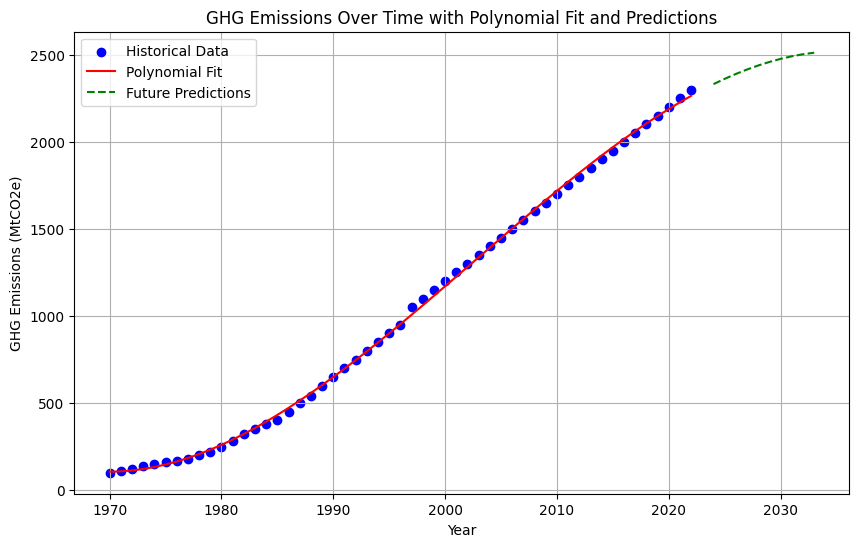

In [12]:
# Plot historical data, polynomial fit, and future predictions
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['GHG Emissions'], color='blue', label='Historical Data')
plt.plot(df['Year'], poly_model.predict(X_poly), color='red', label='Polynomial Fit')
plt.plot(future_years.flatten(), future_predictions, color='green', linestyle='--', label='Future Predictions')
plt.title('GHG Emissions Over Time with Polynomial Fit and Predictions')
plt.xlabel('Year')
plt.ylabel('GHG Emissions (MtCO2e)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Define the target year and emissions
target_year = 2030  # Target year
target_emissions = 1500  # Target emissions in MtCO2e

# Calculate the total reduction needed and annual reduction rate
current_emissions_2022 = df[df['Year'] == 2022]['GHG Emissions'].values[0]
total_reduction_needed = current_emissions_2022 - target_emissions
annual_reduction_rate = total_reduction_needed / (target_year - 2022)

print(f"Total reduction needed by {target_year}: {total_reduction_needed} MtCO2e")
print(f"Annual reduction rate required: {annual_reduction_rate:.2f} MtCO2e per year")


Total reduction needed by 2030: 800 MtCO2e
Annual reduction rate required: 100.00 MtCO2e per year


In [14]:
# Assume 1 tonne of CO2e equals 1 carbon credit
# Calculate potential carbon credits generated
carbon_credits_per_year = annual_reduction_rate

print(f"Estimated annual carbon credits from reduction: {carbon_credits_per_year:.2f} million carbon credits")


Estimated annual carbon credits from reduction: 100.00 million carbon credits


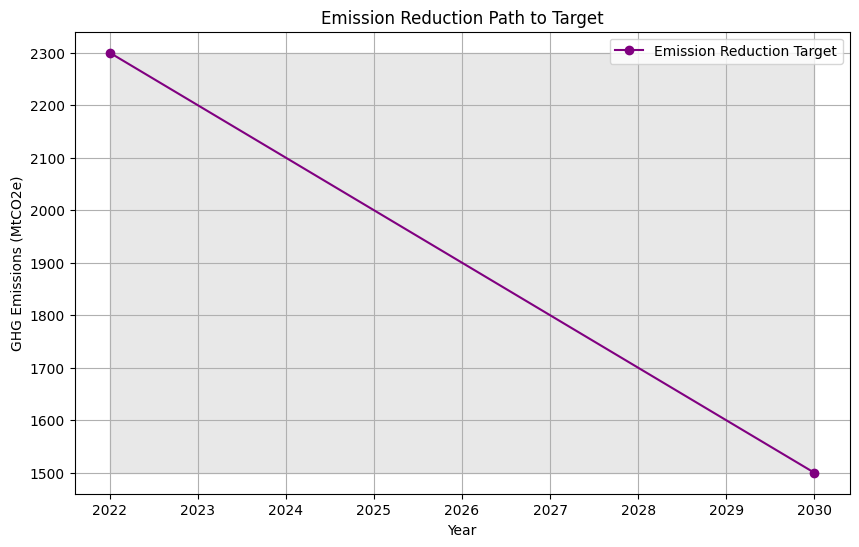

In [15]:
# Define the reduction path
years_for_reduction = np.array([2022, target_year])
emissions_for_reduction = np.array([current_emissions_2022, target_emissions])

# Plot emission reduction path
plt.figure(figsize=(10, 6))
plt.plot(years_for_reduction, emissions_for_reduction, marker='o', color='purple', label='Emission Reduction Target')
plt.fill_between(years_for_reduction, emissions_for_reduction[0], emissions_for_reduction[1], color='lightgray', alpha=0.5)
plt.title('Emission Reduction Path to Target')
plt.xlabel('Year')
plt.ylabel('GHG Emissions (MtCO2e)')
plt.legend()
plt.grid(True)
plt.show()
